In [1]:
import pandas as pd

In [2]:
mydf= pd.read_csv('/Users/sushil/mycsv.csv')

In [3]:
y=pd.DataFrame(mydf['status'], columns=['status'])

In [4]:
x=mydf

In [5]:
x= x.drop(['status', 'url'],1)

/var/folders/8n/85r5xr6d5s13wgrnpmj4lszc0000gn/T/ipykernel_55560/1835674921.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x= x.drop(['status', 'url'],1)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [8]:
ytrain=ytrain['status'].tolist()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn import metrics

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
ytest=ytest['status'].tolist()

In [25]:
for i in range(2,9):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(xtrain, ytrain)
    ypred = neigh.predict(xtest)    
    accuracy = metrics.accuracy_score(ytest, ypred)
    print(f"At K= {i}, Accuracy= {accuracy*100} ")


At K= 2, Accuracy= 80.75801749271136 
At K= 3, Accuracy= 83.03206997084548 
At K= 4, Accuracy= 81.69096209912536 
At K= 5, Accuracy= 83.55685131195335 
At K= 6, Accuracy= 82.44897959183673 
At K= 7, Accuracy= 82.85714285714286 
At K= 8, Accuracy= 81.28279883381924 


In [14]:
cm=confusion_matrix(ytest, ypred)
print(cm)

[[743 110]
 [211 651]]


In [15]:
from sklearn import svm

In [16]:
import matplotlib.pyplot as plt

In [17]:
clf = svm.SVC(random_state=0)

In [18]:
clf.fit(xtrain, ytrain) 

SVC(random_state=0)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


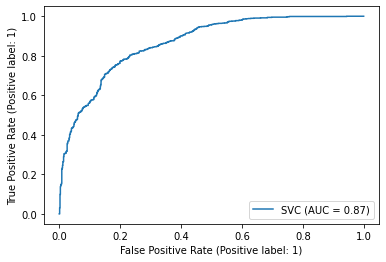

In [19]:
metrics.plot_roc_curve(clf, xtest, ytest) 

In [20]:
fpr,tpr, _=metrics.roc_curve(ytest,ypred)

Text(0.5, 0, 'False Positive Rate')

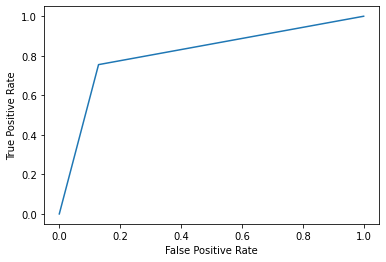

In [21]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')